In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%run mlfunc.ipynb

In [2]:
data = pd.read_csv(r"C:\Konark\Fireblaze\Machine Learning\Final Project\Differentiated Thyroid Cancer Recurrence.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
data.shape

(383, 17)

We have a total of 17 columns and 383 rows in the given dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
data.describe(include='object')

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [6]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Text(0.5, 1.0, 'Boxplot for Age')

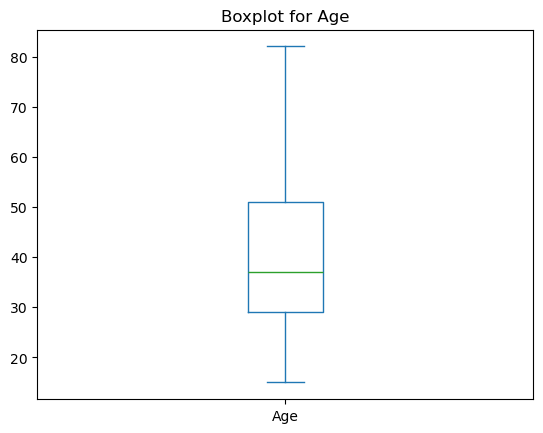

In [7]:
data['Age'].plot(kind='box')
plt.title('Boxplot for Age')

Text(0.5, 1.0, 'Histplot with Kde for Age')

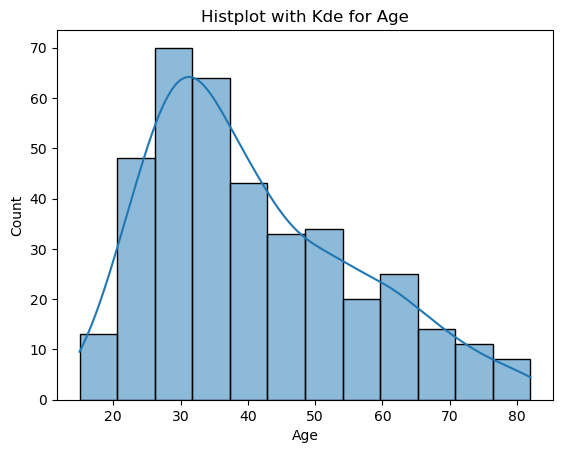

In [8]:
sns.histplot(data['Age'],kde=True)
plt.title('Histplot with Kde for Age')

In [9]:
data['Age'].skew()

0.7197318617338616

In [10]:
from sklearn.preprocessing import PowerTransformer

In [11]:
PT = PowerTransformer()

In [12]:
data['Age'] = PT.fit_transform(data[['Age']])

In [13]:
data['Age'].skew()

0.009941251036983711

Text(0.5, 1.0, 'Histplot with Kde for Age after Transformation')

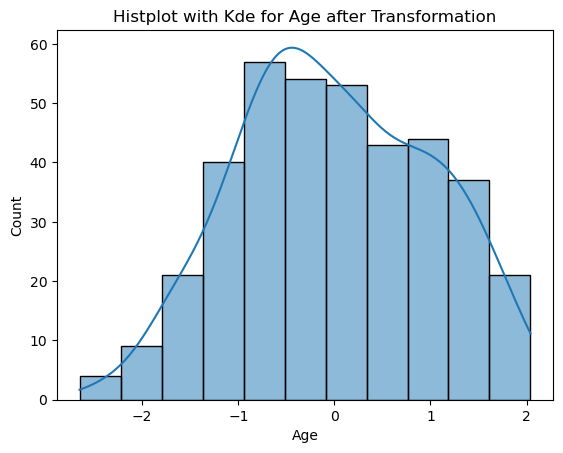

In [14]:
sns.histplot(data['Age'],kde=True)
plt.title('Histplot with Kde for Age after Transformation')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE = LabelEncoder()

In [17]:
for i in data.columns[1:]:
    data[i] = LE.fit_transform(data[[i]])

In [18]:
list(data.columns[1:])

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [19]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,-0.955702,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,-0.309252,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,-0.658766,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,1.315820,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,1.315820,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [21]:
X = data.drop('Recurred',axis=1)
y = data.Recurred

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
r = ['Logistic Regression','KNN Classifier','Random Forest Classifier','Decision Tree Classifier']
L_pred = []
LTRSC = []
LTSSC = []
CM = []
L = [LogisticRegression(max_iter=10000),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(n_estimators=12),DecisionTreeClassifier()]
for i in range(len(L)):    
    L[i].fit(X_train,y_train)
    L_pred.append(L[i].predict(X_test))
    LTRSC.append(L[i].score(X_train,y_train))
    LTSSC.append(accuracy_score(y_test,L_pred[i]))
    CM.append(confusion_matrix(y_test,L_pred[i]))
CT = pd.DataFrame({'Training Score': LTRSC,
                'Accuracy Score': LTSSC,
               },index=[i for i in r])
CT

,Training Score,Accuracy Score
Logistic Regression,0.915033,0.935065
KNN Classifier,0.918301,0.909091
Random Forest Classifier,1.000000,0.974026
Decision Tree Classifier,1.000000,0.896104


In [24]:
print(classification_report(y_test,L_pred[2]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77



<Figure size 640x480 with 0 Axes>

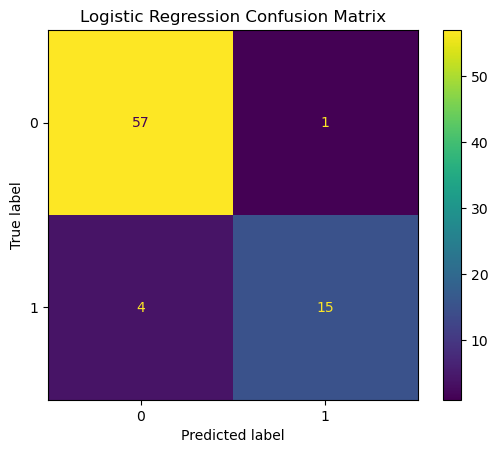

<Figure size 640x480 with 0 Axes>

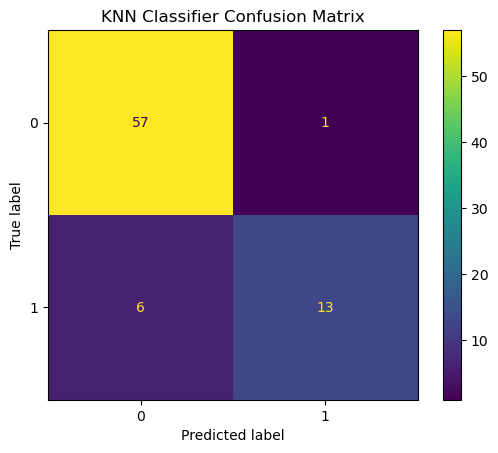

<Figure size 640x480 with 0 Axes>

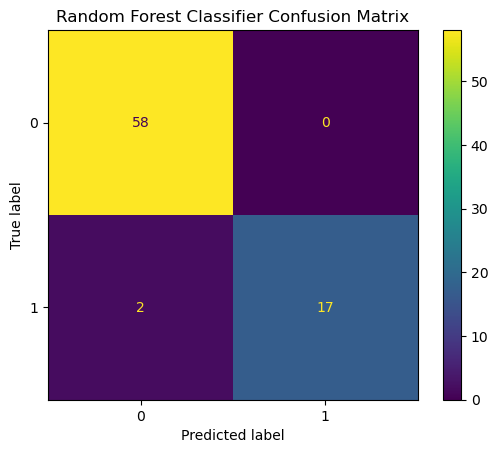

<Figure size 640x480 with 0 Axes>

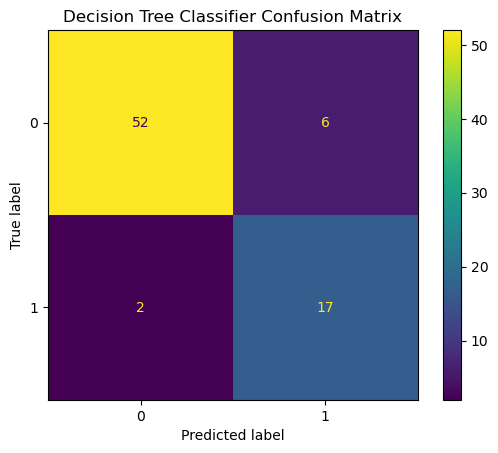

In [25]:
for i in range(len(L)):   
    plt.figure()
    ConfusionMatrixDisplay(CM[i]).plot()
    plt.title(r[i]+' Confusion Matrix')
    plt.show()

In [26]:
Tr = []
Ts = []
for i in range(3,11):
    KNC = KNeighborsClassifier(n_neighbors=i)
    KNC.fit(X_train,y_train)
    Tr.append(KNC.score(X_train,y_train))
    Ts.append(KNC.score(X_test,y_test))

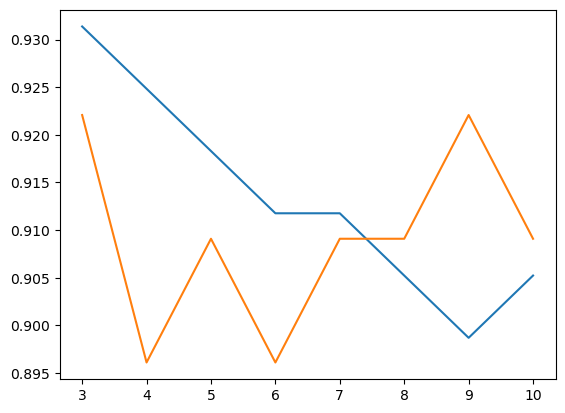

In [27]:
plt.figure()
plt.plot(range(3,11),Tr)
plt.plot(range(3,11),Ts)
plt.show()

In [28]:
np.array(Tr)-np.array(Ts)

array([ 0.00929463,  0.02873271,  0.00920974,  0.01566081,  0.0026738 ,
       -0.00386215, -0.02338511, -0.00386215])

In [29]:
Tr = []
Ts = []
for i in range(1,51):
    RFC = RandomForestClassifier(n_estimators=i)
    RFC.fit(X_train,y_train)
    Tr.append(RFC.score(X_train,y_train))
    Ts.append(RFC.score(X_test,y_test))

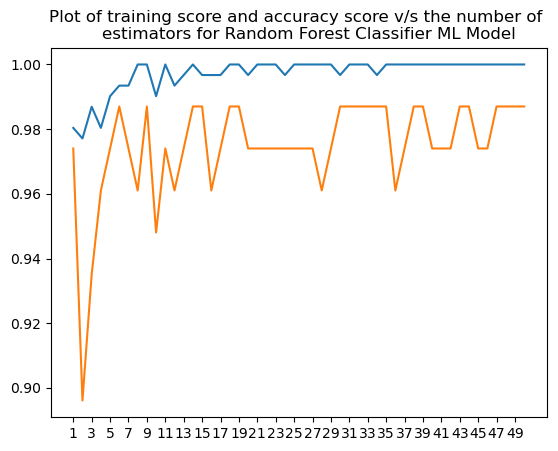

In [30]:
plt.figure()
plt.plot(range(1,51),Tr)
plt.plot(range(1,51),Ts)
plt.xticks(range(1,51,2))
plt.title('''Plot of training score and accuracy score v/s the number of 
    estimators for Random Forest Classifier ML Model''')
plt.show()

In [31]:
np.argmax(Ts)+3

8

In [32]:
X_test

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
268,-0.478097,0,0,0,0,2,3,3,3,1,2,3,0,0,0,1
250,-0.658766,0,0,0,0,4,2,5,0,1,2,3,0,0,0,1
318,-0.658766,0,0,0,0,2,1,0,3,0,1,3,2,0,0,3
331,0.797392,0,0,0,0,2,3,3,0,1,1,3,0,0,0,3
56,0.336600,0,0,1,0,2,4,3,3,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-0.392289,0,0,0,0,1,4,5,3,1,2,2,0,0,0,1
167,0.998973,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1
63,0.950120,0,0,0,0,2,1,3,3,1,2,1,0,0,0,2
233,-0.309252,0,0,0,0,2,4,5,3,1,1,2,2,0,0,3


In [33]:
origdata = pd.read_csv(r"C:\Konark\Fireblaze\Machine Learning\Final Project\Differentiated Thyroid Cancer Recurrence.csv")
origdata.iloc[241]

Age                                              62
Gender                                            M
Smoking                                          No
Hx Smoking                                       No
Hx Radiothreapy                                  No
Thyroid Function                          Euthyroid
Physical Examination    Single nodular goiter-right
Adenopathy                                       No
Pathology                                 Papillary
Focality                                  Uni-Focal
Risk                                            Low
T                                                T2
N                                                N0
M                                                M0
Stage                                             I
Response                      Structural Incomplete
Recurred                                        Yes
Name: 241, dtype: object

In [34]:
origdata['Age'].describe()

count    383.000000
mean      40.866841
std       15.134494
min       15.000000
25%       29.000000
50%       37.000000
75%       51.000000
max       82.000000
Name: Age, dtype: float64

In [35]:
data['Age'].describe()

count    3.830000e+02
mean     3.895926e-16
std      1.001308e+00
min     -2.652252e+00
25%     -7.540440e-01
50%     -7.518363e-02
75%      7.973920e-01
max      2.040829e+00
Name: Age, dtype: float64

In [36]:
###X_ip = []
X_ip.append(int(input('Enter the Age of the Patient: ')))
X_ip.append(int(input('Enter the Gender of the Patient: 0 for Female, 1 for Male')))
X_ip.append(int(input('Does the Patient smokes?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Does the Patient have a history of smoking?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Does the Patient have a history of Radiography?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Enter the Thyroid Function of the Patient: 0 for Clinical Hyperthyroidism, 1 for Clinical Hypothyroidism, 2 for Euthyroid, 3 for Subclinical Hyperthyroidism, 4 for Subclinical Hypothyroidism ')))
X_ip.append(int(input('Enter the Physical Examination of the Patient: 0 for Diffuse goiter, 1 for Multinodular goiter, 2 for Normal, 3 for Single nodular goiter-left, 4 for Single nodular goiter-right ')))
X_ip.append(int(input('Enter the Adenopathy of the Patient: 0 for Bilateral, 1 for Extensive, 2 for Left, 3 for No, 4 for Posterior, 5 for Right ')))
X_ip.append(int(input('Enter the Pathology of the Patient: 0 for Follicular, 1 for Hurthel cell, 2 for Micropapillary, 3 for Papillary ')))
X_ip.append(int(input('Enter the Focality of the Patient: 0 for Multi-Focal, 1 for Uni-Focal ')))
X_ip.append(int(input('Enter the Risk of the Patient: 0 for High, 1 for Intermediate, 2 for Low')))
X_ip.append(int(input('Enter the T of the Patient: 0 for T1a, 1 for T1b, 2 for T2, 3 for T3a, 4 for T3b, 5 for T4a, 6 for T4b ')))
X_ip.append(int(input('Enter the N of the Patient: 0 for N0, 1 for N1a, 2 for N1b ')))
X_ip.append(int(input('Enter the M of the Patient: 0 for M0, 1 for M1 ')))
X_ip.append(int(input('Enter the Cancer Stage of the Patient: 0 for I, 1 for II, 2 for III, 3 for IVA, 4 for IVB ')))
X_ip.append(int(input('Enter the Response of the Patient on the Therapy: 0 for Biochemical Incomplete, 1 for Excellent, 2 for Indeterminate, 3 for Structural Incomplete ')))
a=0
while(a!=1):    
    if X_ip[0] in list(origdata['Age']):
        X_ip[0] = data[origdata['Age']==X_ip[0]].iloc[0][0]
        a=1
    else:
        if X_ip[0]>82:
            X_ip[0]-=1
        else:
            X_ip[0]+=1
        a = 0
Result = int(RFC.predict([X_ip]))
if Result==0:
    print("\n\n","There should be no risk of the Thyroid Cancer Recurrence for this patient.")
else:
    print("\n\n","There's a risk of the Thyroid Cancer Recurrence for this patient.")

NameError: name 'X_ip' is not defined

In [ ]:
int(np.array([0]))

In [ ]:
sns.barplot(origdata,x='Recurred',y='Age',hue='Risk')
plt.title('Barplot of Age v/s Recurred for Risk')
plt.show()

We can notice that in case of where the Risk was high, there was a certainty in the cancer recurrence.

In [ ]:
sns.barplot(origdata,x='Recurred',y='Age',hue='Stage')
plt.title('Barplot of Age v/s Recurred for Stage')
plt.show()

We can notice that in case of where the cancer stage is 3 or above, there was a certainty in the cancer recurrence.

In [ ]:
sns.barplot(origdata,x='Recurred',y='Age',hue=origdata.columns[13])
plt.title('Barplot of Age v/s Recurred for M')
plt.show()

We can notice that in case of where the M parameter is M1, there was a certainty in the cancer recurrence.

In [ ]:
X_ip = []
X_ip.append(int(input('Enter the Age of the Patient: ')))
X_ip.append(int(input('Enter the Gender of the Patient: 0 for Female, 1 for Male')))
X_ip.append(int(input('Does the Patient smokes?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Does the Patient have a history of smoking?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Does the Patient have a history of Radiography?: 0 for No, 1 for Yes ')))
X_ip.append(int(input('Enter the Thyroid Function of the Patient: 0 for Clinical Hyperthyroidism, 1 for Clinical Hypothyroidism, 2 for Euthyroid, 3 for Subclinical Hyperthyroidism, 4 for Subclinical Hypothyroidism ')))
X_ip.append(int(input('Enter the Physical Examination of the Patient: 0 for Diffuse goiter, 1 for Multinodular goiter, 2 for Normal, 3 for Single nodular goiter-left, 4 for Single nodular goiter-right ')))
X_ip.append(int(input('Enter the Adenopathy of the Patient: 0 for Bilateral, 1 for Extensive, 2 for Left, 3 for No, 4 for Posterior, 5 for Right ')))
X_ip.append(int(input('Enter the Pathology of the Patient: 0 for Follicular, 1 for Hurthel cell, 2 for Micropapillary, 3 for Papillary ')))
X_ip.append(int(input('Enter the Focality of the Patient: 0 for Multi-Focal, 1 for Uni-Focal ')))
X_ip.append(int(input('Enter the Risk of the Patient: 0 for High, 1 for Intermediate, 2 for Low')))
X_ip.append(int(input('Enter the T of the Patient: 0 for T1a, 1 for T1b, 2 for T2, 3 for T3a, 4 for T3b, 5 for T4a, 6 for T4b ')))
X_ip.append(int(input('Enter the N of the Patient: 0 for N0, 1 for N1a, 2 for N1b ')))
X_ip.append(int(input('Enter the M of the Patient: 0 for M0, 1 for M1 ')))
X_ip.append(int(input('Enter the Cancer Stage of the Patient: 0 for I, 1 for II, 2 for III, 3 for IVA, 4 for IVB ')))
X_ip.append(int(input('Enter the Response of the Patient on the Therapy: 0 for Biochemical Incomplete, 1 for Excellent, 2 for Indeterminate, 3 for Structural Incomplete ')))

In [ ]:
def model(Age,Gender,Smoking,HxSmoking,HxRadiothreapy,ThyroidFunction,PhysicalExamination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred):     
    a=0
    while(a!=1):    
        if Age in list(origdata['Age']):
            Age = data[origdata['Age']==inputs[0]].iloc[0][0]
            a=1
        else:
            if Age>82:
                inputs[0]-=1
            else:
                inputs[0]+=1
            a = 0
    input = np.array(Age,Gender,Smoking,HxSmoking,HxRadiothreapy,ThyroidFunction,PhysicalExamination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred)
    Result = int(RFC.predict(input))
    if Result==0:
        return "There should be no risk of the Thyroid Cancer Recurrence for this patient."
    else:
        return "There's a risk of the Thyroid Cancer Recurrence for this patient."

In [ ]:
import gradio as gr

def model(Age,Gender,Smoking,HxSmoking,HxRadiothreapy,ThyroidFunction,PhysicalExamination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred):     

    input = np.array([[Age,Gender,Smoking,HxSmoking,HxRadiothreapy,ThyroidFunction,PhysicalExamination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred]])
    Result = int(RFC.predict(input))[0]
    if Result==0:
        return "There should be no risk of the Thyroid Cancer Recurrence for this patient."
    else:
        return "There's a risk of the Thyroid Cancer Recurrence for this patient."

inputs = [
          gr.Number(label=f"Enter the Age of the Patient:"),
          gr.Number(label=f"Enter the Gender of the Patient: 0 for Female, 1 for Male"),
          gr.Number(label=f"Does the Patient smokes?: 0 for No, 1 for Yes"),
          gr.Number(label=f"Does the Patient have a history of smoking?: 0 for No, 1 for Yes"),
          gr.Number(label=f"Does the Patient have a history of Radiography?: 0 for No, 1 for Yes"),
          gr.Number(label=f"Enter the Thyroid Function of the Patient: 0 for Clinical Hyperthyroidism, 1 for Clinical Hypothyroidism, 2 for Euthyroid, 3 for Subclinical Hyperthyroidism, 4 for Subclinical Hypothyroidism"),
          gr.Number(label=f"Enter the Physical Examination of the Patient: 0 for Diffuse goiter, 1 for Multinodular goiter, 2 for Normal, 3 for Single nodular goiter-left, 4 for Single nodular goiter-right"),
          gr.Number(label=f"Enter the Adenopathy of the Patient: 0 for Bilateral, 1 for Extensive, 2 for Left, 3 for No, 4 for Posterior, 5 for Right"),
          gr.Number(label=f"Enter the Pathology of the Patient: 0 for Follicular, 1 for Hurthel cell, 2 for Micropapillary, 3 for Papillary"),
          gr.Number(label=f"Enter the Focality of the Patient: 0 for Multi-Focal, 1 for Uni-Focal"),
          gr.Number(label=f"Enter the Risk of the Patient: 0 for High, 1 for Intermediate, 2 for Low"),
          gr.Number(label=f"Enter the T of the Patient: 0 for T1a, 1 for T1b, 2 for T2, 3 for T3a, 4 for T3b, 5 for T4a, 6 for T4b"),
          gr.Number(label=f"Enter the N of the Patient: 0 for N0, 1 for N1a, 2 for N1b"),
          gr.Number(label=f"Enter the M of the Patient: 0 for M0, 1 for M1"),
          gr.Number(label=f"Enter the Cancer Stage of the Patient: 0 for I, 1 for II, 2 for III, 3 for IVA, 4 for IVB"),
          gr.Number(label=f"Enter the Response of the Patient on the Therapy: 0 for Biochemical Incomplete, 1 for Excellent, 2 for Indeterminate, 3 for Structural Incomplete")
]
output = gr.Textbox(label="Prediction Result")

# Create the Gradio app
app = gr.Interface(fn=model, inputs=inputs, outputs=output, title="ML Prediction")

# Launch the app
app.launch()


In [ ]:
data.columns